# AIM 5001 - Project 2#

*In this project I will be using a dataset on different kinds of traditional famous Indian dishes, and answers research questions based on the research findings.*

The source of the dataset can be found [here](https://www.kaggle.com/nehaprabhavalkar/indian-food-101)

In [6]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

df = 'https://raw.githubusercontent.com/Humayrakausar/AIM-5001/master/indian_food.csv'
Indianf_df = pd.read_csv(df)

# Use the head function to confirm the data loaded properly
Indianf_df.head() 

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# Introduction#

*In this project, I have chosen to work on a dataset on Indian cuisine. This dataset consists of about 255 traditional famous Indian dishes, their ingredients, and place of origin. My research will be useful for those who are interested in Indian cuisine. More precisely for the tourists, and people from different culture inclined to experience Indian cuisine. People those who are vegetarian will find this research very useful, as this dataset consists of a large number vegetarian dishes. Indian cuisine reflects an eight thousand years of history of various groups and cultural interaction with the Indian subcontinent. It heavily influenced by religion, cultural choice, and traditions. Other cuisine across the world influenced by Indian cuisine, especially British cuisine, and middle eastern cuisine.*

*The purpose of the analysis as follows:*
<ol>
<li> Find out the name of the dishes.</li>
<li> Find out the preparation and cooking time for all the dishes</li>
<li> Find out the diet prevailing in the Indian cuisine such as vegetarian and non-vegetarian dishes.</li>
<li> Find out cooking and preparation time based on diet such vegetarian and non vegetarian.</li> 
<li> Find out cooking and preparation time based on the course and number of dishes of each of the course.</li> 
<li> Find out which flavour is more famous and holding a big place in Indian cuisine</li>


# Data Summary#

For this project I acquired the dataset form kaggle. The use case of the dataset as follows:
<li> To learn preparing traditional Indian cuisine</li>
<li> To learn origin of each of the dishes</li>
<li> To learn of the famous dishes based on the region and state</li>
<li> To know about different flavor of dishes</li>
<li> The Ingredient use in Indian cuisine</li>
<li> To know about vegetarian and non-vegetation dishes</li>
<li> To know the preparation time and cooking time of Indian dishes</li>

According to the website, the attributes of the data as follows:

<li> Name : name of the dish</li>
<li> Ingredients : main ingredients used</li>
<li> Diet : type of diet - either vegetarian or non-vegetarian</li>
<li> Prep_time : preparation time</li>
<li> Cook_time : cooking time</li>
<li> Flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc</li>
<li> Course : course of meal - starter, main course, dessert, etc</li>
<li> State : state where the dish is famous or is originated</li>
<li> Region : region where the state belongs </li>

Data type as follows:
     Column          Datatype  Category 
<li> Name        -   Object    Categorical/ Nominal</li> 
<li> Ingredients -   Object    Categorical/ Nominal</li>
<li> Diet        -   Object    Categorical/ Ordinal</li>
<li> Prep_time   -   int       Continous</li> 
<li> Cook_time   -   int       Continous</li>
<li> Flavor_profile -Object    Categorical/Nominal</li>
<li> Course        - Object    Categorical/Ordinal</li> 
<li> State         - Object    Categorical/Nominal</li>
<li> Region        - Object    Categorical/Nominal</li>

**Data transformation - Subset**

*In this stage, I will limit my dataset to simplify the reseach by retaining only the columns I need to answer my research questions.* 

In [7]:
# Create a subset of the main dataframe 

sub_Indianf_df = Indianf_df[['name', 'diet', 'prep_time', 'cook_time', 'flavor_profile',
                            'course','state', 'region']]
# Use the head function to confirm the data loaded properly
sub_Indianf_df.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal,East


**Data transformation - Null Values**

*Now I will check if there is any null value contain in the dataset*

In [8]:
# Use the isnull function and sum to see if there are any null values in the data set.

sub_Indianf_df.isnull().sum()

name              0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

*It appears the region column contains null values that I need to remove*

In [16]:
# Count the number of rows as the research required to remove all the null values from the region column.
x = sub_Indianf_df.shape[0]
# Print the result
print("The number of rows including nulls is", x)

The number of rows including nulls is 255


*It appears the region column contains null values that I required to remove to conduct unbiased 
research and reach to the right answers of each of the research question. In order to remove the null values I use dropna function which I learnt from (http://localhost:8890/notebooks/Downloads/AIM-5001-SampleProject1.ipynb)*

In [10]:
# Create a copy of the dataframe which will allow me remove the null values
sub_Indianf_dfnonulls = sub_Indianf_df.copy()

# Use dropna function to remove the null vlaues
sub_Indianf_dfnonulls.dropna(subset=['prep_time', 'cook_time', 'flavor_profile', 'course',
                                    'state', 'region'],inplace=True)

# Again use isnull and sum function to check whether the null values removed properly. 
sub_Indianf_dfnonulls.isnull().sum()

name              0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

*It appears there is no null values exist in the dataset anymore*

*Now check the row again just to see how many rows retained after deleting all the null values*

In [20]:
# Check the number of rows of the latest datframe
y = sub_Indianf_dfnonulls.shape[0]

# Print the result
print("The number of rows retaind in my data frame is", y)


The number of rows retaind in my data frame is 254


**Data transformation - Negative Values**

In [11]:
# Replace all the -1 values with 0
sub_Indianf_dfnonulls=sub_Indianf_dfnonulls.replace(-1,np.nan)

sub_Indianf_dfnonulls=sub_Indianf_dfnonulls.replace('-1',np.nan)

sub_Indianf_dfnonulls.fillna(0)

,name,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...
250,Til Pitha,vegetarian,5.0,30.0,sweet,dessert,Assam,North East
251,Bebinca,vegetarian,20.0,60.0,sweet,dessert,Goa,West
252,Shufta,vegetarian,0.0,0.0,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


*It appears I was able to deleted all the null values and replaces -1 values with 0 successfully*

 **Exploratory Data Analysis - Display the name of the dishes and find out prep and cook time**

*In this stage of my research I will perform some Exploratory data analysis that will allow me to answer my research question. Also, I will do graphical presentation of the attributes to provide precise picture.* 

%matplotlib notebook

In [19]:
# To exhibits name of all the dishes
sub_Indianf_dfnonulls["name"].unique()


array(['Balu shahi', 'Boondi', 'Gajar ka halwa', 'Ghevar', 'Gulab jamun',
       'Imarti', 'Jalebi', 'Kalakand', 'Lassi', 'Petha', 'Phirni',
       'Rabri', 'Sheera', 'Singori', 'Sohan halwa', 'Chhena jalebi',
       'Chhena poda', 'Cham cham', 'Kheer sagar', 'Ledikeni', 'Lyangcha',
       'Malapua', 'Mihidana', 'Misti doi', 'Pantua', 'Pithe', 'Rasabali',
       'Ras malai', 'Rasgulla', 'Sandesh', 'Adhirasam', 'Ariselu',
       'Bandar laddu', 'Chikki', 'Dharwad pedha', 'Double ka meetha',
       'Gavvalu', 'Kakinada khaja', 'Kuzhi paniyaram', 'Mysore pak',
       'Obbattu holige', 'Palathalikalu', 'Poornalu', 'Pongal',
       'Pootharekulu', 'Qubani ka meetha', 'Sheer korma', 'Unni Appam',
       'Kajjikaya', 'Anarsa', 'Basundi', 'Dhondas', 'Doodhpak',
       'Mahim halwa', 'Modak', 'Shankarpali', 'Shrikhand', 'Sutar feni',
       'Maach Jhol', 'Chak Hao Kheer', 'Galho', 'Aloo gobi', 'Aloo tikki',
       'Aloo matar', 'Aloo methi', 'Aloo shimla mirch', 'Bhatura',
       'Bhindi masala

*Name of all the dishes are above*

In [28]:
# Use describe function to figure out minimum, average and maximum prep_time and cook_time
sub_Indianf_dfnonulls.describe()

,prep_time,cook_time
count,224.000000,226.000000
mean,35.500000,38.973451
std,76.392837,49.522692
min,5.000000,2.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,45.000000
max,500.000000,720.000000


*From the information above, it can be stated that average preparation time and cooking time for Indian dishes are 35 minute and 39 minutes, respectively. The minimum prep time and cook time are 5 minutes and 2 minutes. The maximum prep time for Indian dishes is 500 minutes whilst maximum cook time is 720 minutes.*

*First I will exhibits prep_time and cook_time for all the dishes*

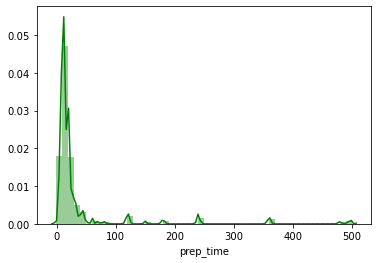

In [14]:
# Create a histogram to display the prep time
sns.distplot(sub_Indianf_dfnonulls['prep_time'],color ='green')


*From the graph above it can be stated the preparation time of most of the dishes are from 0 to approximately 30 minutes. The graph is skewed right, this means that the maximum preparation time is up to 500 minutes.*

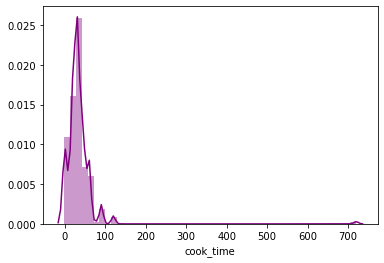

In [14]:
# Create a histogram to display the cook time of the dishes
sns.distplot(sub_Indianf_dfnonulls['cook_time'],color ='purple')

*From the graph above it can be stated the cooking time of most of the dishes are from 0 to approximately 1 hour. The graph is skewed right, this means that the maximum cooking time is a little over 700 minutes.*

 **Exploratory Data Analysis - Vegetarian and Non-Vegetarian dishes**

*Here I will display the number of dishes based on diet such as Vegetarian and Non-Vegetarian*

In [14]:
# Define a new variable to get the number of Vegetarain and Non vegetarian dishes
# I used size funtion to get  the number of Vegetarain and Non vegetarian dishes
d_dishes_df = sub_Indianf_dfnonulls.groupby(['diet']).size()

# To get the Number of Vegetarain and Non vegetarian dishes
d_dishes_df

diet
non vegetarian     29
vegetarian        225
dtype: int64

<BarContainer object of 2 artists>

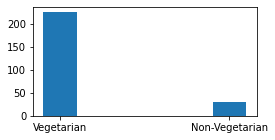

In [10]:
# Create a bar chart to visualize the number of vegetarian and non-vegetarian dishes

Vegetarian = (sub_Indianf_dfnonulls['diet'].str[0].str.lower() == 'v').sum()

NoVegetarian = (sub_Indianf_dfnonulls['diet'].str[0].str.lower() == 'n').sum()

names = ["Vegetarian", "Non-Vegetarian"]
values = [Vegetarian, NoVegetarian]

fig, axs = plt.subplots(1, 1, figsize=(4, 2))
axs.bar(names, values, width = 0.2)

*From the bar chart above it can be stated that, a considerable number of dishes are veteratian at 225, whilst Non Vegetarian dishes are less 29.* 

 **Exploratory Data Analysis - cooking and preparation time based on diet such as vegetarian and non vegetarian**

*Here, I will display prep_time based on diet*

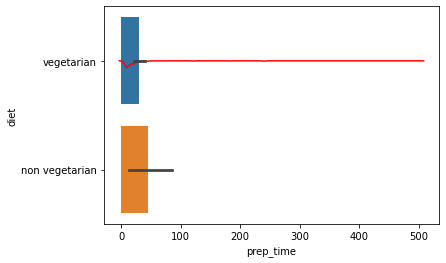

In [47]:
# Create a bar plot to visualize the prep_time variation of the dishes based on diet
sns.barplot(x='prep_time', y='diet', data=sub_Indianf_dfnonulls, orient='h')

*From the graph above it can be stated that Non vegetarian dishes take more prepreration time compared to vegetarian dishes.*

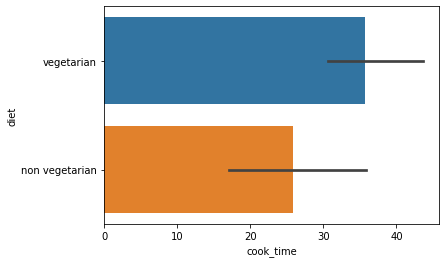

In [23]:
# Create bar chart to visualize the cook time variation of the dishes based on diet
sns.barplot(x='cook_time', y='diet', data=sub_Indianf_dfnonulls, orient='h')

*From the graph above it can be asserted that vegetarian dishes take longer time to cook at about 30 minutes, than Non vegetarian dishes at about 25 minutes which is opposite of prep time of vegetarian dishes. The prep time of vegetarian dishes is shorter than non-vegetarian dishes*

 **Exploratory Data Analysis - Prep_time and Cook_time based on the course**

*Now I will exhibits prep time and cook time based on the course*

In [23]:
# Define a new variable called c_dishes_df to get the total number of each course
# I used size function to get the total number of each of the course
c_dishes_df = sub_Indianf_dfnonulls.groupby(['course']).size()

# To get the total number of each of the course 
c_dishes_df

course
dessert         84
main course    129
snack           39
starter          2
dtype: int64

*From the information above it can be stated that the largest number of main course at 129 dishes are in Indian cuisine compared to other courses, this means that main courses are more famous compared to other courses followed by dessert at 84 types.*

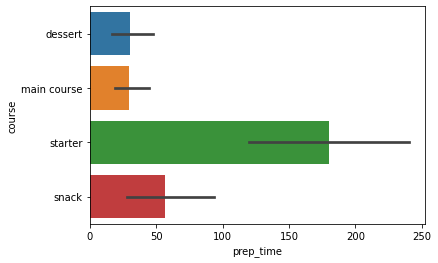

In [18]:
# Create a barplot to visualize the prep time variation by course
sns.barplot(x='prep_time', y='course', data=sub_Indianf_dfnonulls, orient='h')

*From the graph above it can be said that the starter takes considerably longer prep time than other courses, whilst the main course takes the shortest prep time among the courses.* 

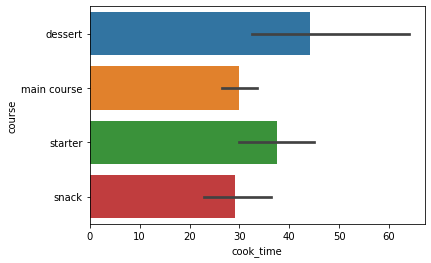

In [22]:
# Create a barplot to visualize the cook time variation by course 
sns.barplot(x='cook_time', y='course', data=sub_Indianf_dfnonulls, orient='h')

*From the graph above it can be stated that the dessert takes longer cook time compared to other courses, whilst the snack takes shortest time.*

In [24]:
# Define a new variable to called flv_dishes_df to find out the number of dishes based on flavour
flv_dishes_df = sub_Indianf_dfnonulls.groupby(['flavor_profile']).size()

# To get the number of dishes based on flavour
flv_dishes_df

flavor_profile
bitter      4
sour        1
spicy     133
sweet      87
dtype: int64

*From the information above it can be stated that the spicy dishes are more famous in Indian cuisine. The largest number of spicy dishes made it substantial.*

### Answers of the research Questions

<ol>
<li> Find out the name of the dishes.</li>
<li> Find out the preparation and cooking time for all the dishes</li>
<li> Find out the diet prevailing in the Indian cuisine such as vegetarian and non-vegetarian dishes.</li>
<li> Find out cooking and preparation time based on diet such vegetarian and non vegetarian.</li> 
<li> Find out cooking and preparation time based on the course and number of dishes of each of the course.</li> 
<li> Find out which flavour is more famous and holding a big place in Indian cuisine</li>

 **Find out the name of the dishes.**

All the dishes name are stated above, 

**Find out the preparation and cooking time for all the dishes**

*The preparation time of most of the dishes are from 0 to approximately 30 minutes. The graph is skewed right, this means that the maximum preparation time is up to 500 minutes.The cooking time of most of the dishes are from 5 minutes to approximately 1 hour. The graph is skewed right, this means that the maximum cooking time is a little over 700 minutes.*

**Find out the diet prevailing in the Indian cuisine such as vegetarian and non-vegetarian dishes**

 *A considerable number of dishes are vegetarian at above 225, whilst Non Vegetarian dishes are less 29.* 

**Find out cooking and preparation time based on diet such vegetarian and non vegetarian**

*Non vegetarian dishes take more prepreration time at about 45 minutes compared to vegetarian dishes at about 25 minutes. Vegetarian dishes take longer time to cook at about 30 minutes, than Non vegetarian dishes at about 25 minutes which is opposite of prep time of vegetarian dishes. The prep time of vegetarian dishes is shorter than non-vegetarian dishes*

**Find out cooking and preparation time based on the course and number of dishes of each of the course**

*The starter takes considerably longer prep time at about 1 hour and 15 minutes then other courses, whilst the main course takes the shortest prep time at about 25 minutes among the courses. The dessert takes longer cook time at about 45 minutes compared to other courses, whilst the snack takes shortest time at about 28 minutes.The largest number of main course at 129 dishes are in Indian cuisine compared to other courses, this means that main courses are more famous compared to other courses followed by dessert at 84 types*

**Find out which flavour is more famous and holding a big place in Indian cuisine**

*The spicy dishes are more famous in Indian cuisine. The largest number of spicy dishes at 133 made it substantial.*

### Conclusion

*The purpose of this research was to inform about the different dishes of Indian cuisine, and number of dishes based on diet. From this research it can be stated that vegetarian dishes at 255 are prevailing in Indian cuisine, therefore, I would recommend for the people those who are vegetarian to try those dishes. Also, find out the prep time and cook time based on diet. Within 1 and 15 anyone can prepare and cook vegetarian or non-vegetarian dish. The research aim was to find out prep time and cook time based on the course. From the research it can be stated that the starter takes considerably longer prep time about 1 hour 15 minutes, whilst main course takes the shortest prep time at about 25 minutes. The dessert takes longer cook time at about 45 minutes compared to other courses, whilst the snack takes shortest time at about 28 minutes. Anyone wants to learn to cook Indian cuisine might find this research useful. People those who loves spicy food I would recommend Indian cuisine.There are 133 spicy dishes are includes in Indian cuisine*  

### References

https://www.kaggle.com/nehaprabhavalkar/indian-food-101

http://localhost:8890/notebooks/Downloads/AIM-5001-Week7-LectureNotes%20(1).ipynb

http://localhost:8890/notebooks/Downloads/AIM-5001-SampleProject1.ipynb

http://localhost:8890/notebooks/Downloads/h_kausar_Project1.ipynb